In [15]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib


5 Data Teratas
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80  

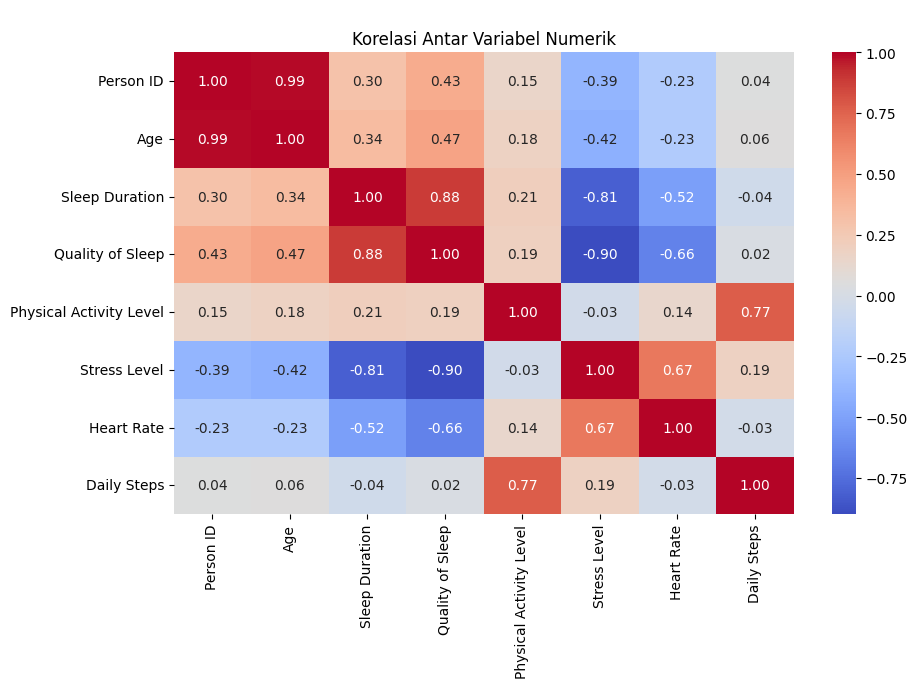

In [24]:
# Load Dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

print("\n5 Data Teratas")
print(df.head())

print("\nInformasi Struktur Dataset")
df.info()

print("\nStatistik Deskriptif Dataset")
print(df.describe())

# Cek missing value
print("\nMissing Value:")
print(df.isnull().sum())

# Heatmap korelasi (numerik saja)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("\nKorelasi Antar Variabel Numerik")
plt.show()

In [25]:
# DATA PREPARATION

# Drop kolom yang tidak relevan
df = df.drop(columns=["Person ID", "Sleep Disorder", "Occupation"])

# Encoding variabel kategorikal
gender_encoder = LabelEncoder()
bmi_encoder = LabelEncoder()
df["Gender"] = gender_encoder.fit_transform(df["Gender"])
df["BMI Category"] = bmi_encoder.fit_transform(df["BMI Category"])

# Pecah Blood Pressure menjadi dua kolom
df[["Systolic", "Diastolic"]] = df["Blood Pressure"].str.split("/", expand=True)
df["Systolic"] = df["Systolic"].astype(int)
df["Diastolic"] = df["Diastolic"].astype(int)

df.drop(columns=["Blood Pressure"], inplace=True)

df.head()

# Fitur dan Target
fitur_prediktor = [
    "Age",
    "Gender",
    "Physical Activity Level",
    "Stress Level",
    "BMI Category",
    "Heart Rate",
    "Daily Steps",
    "Systolic",
    "Diastolic"
]

X = df[fitur_prediktor]
y = df["Quality of Sleep"]

X.head(), y.head()

(   Age  Gender  Physical Activity Level  Stress Level  BMI Category  \
 0   27       1                       42             6             3   
 1   28       1                       60             8             0   
 2   28       1                       60             8             0   
 3   28       1                       30             8             2   
 4   28       1                       30             8             2   
 
    Heart Rate  Daily Steps  Systolic  Diastolic  
 0          77         4200       126         83  
 1          75        10000       125         80  
 2          75        10000       125         80  
 3          85         3000       140         90  
 4          85         3000       140         90  ,
 0    6
 1    6
 2    6
 3    4
 4    4
 Name: Quality of Sleep, dtype: int64)

In [26]:
# SPLITTING DATA (70-15-15)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    shuffle=True
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    shuffle=True
)

print("Train :", X_train.shape)
print("Validation:", X_val.shape)
print("Test :", X_test.shape)

Train : (261, 9)
Validation: (56, 9)
Test : (57, 9)


In [27]:
# TRAINING DAN MODELING

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=300, n_jobs=-1, random_state=42)

Hasil Evaluasi
MAE  : 0.072
MSE  : 0.034
RMSE : 0.183
R²   : 0.976


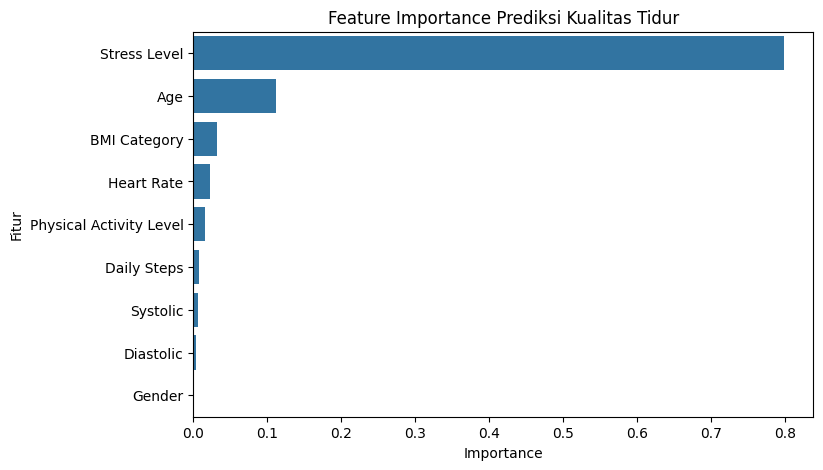

In [29]:
# TESTING DAN EVALUASI

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Hasil Evaluasi")
print(f"MAE  : {mae:.3f}")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")

# Feature Importance
feature_importance = pd.DataFrame({
    "Fitur": fitur_prediktor,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

plt.figure(figsize=(8,5))
sns.barplot(
    data=feature_importance,
    x="Importance",
    y="Fitur"
)
plt.title("Feature Importance Prediksi Kualitas Tidur")
plt.show()

In [30]:
# SIMPAN MODEL

joblib.dump(rf_model, "rf_quality_sleep_model.pkl")
joblib.dump(fitur_prediktor, "fitur_prediktor.pkl")
joblib.dump(gender_encoder, "gender_encoder.pkl")
joblib.dump(bmi_encoder, "bmi_encoder.pkl")

['bmi_encoder.pkl']